<a href="https://colab.research.google.com/github/MarcosEurich/Generacion-Codigos-nuevos/blob/main/Eurich_Marcos_ZARA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ZARA: Clothing retail chain-Machine Learning**


En este proyecto se abordará un análisis exhaustivo sobre las ventas de indumentaria de la cadena ZARA como asi tambien su relación con otras variables. El dataset está compuesto por la venta de cada uno de sus productos con su precio,genero,estación,cantidad de ventas

HIPÓTESIS

1- Cuanto productos según estacion se venden por temporada?.

2- Cuantos productos según género se vende por temporada?

3-Analizar las venta por género y origen del material?

4-Que relación hay entre el Género y el tipo de producto?

5-Que ralación tienen los productos de temporada con las ventas?

OBJETIVO

Calcular las ventas de en los próximos años

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **🟠 1 Lectura de Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Curso Data Science 2/Proyecto Final/Pre-Entrega/Zara_sales_EDA.csv', delimiter=';')
display(df.head())

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


# **🟠 2 DATA QUALITY**

In [ ]:
#----------------------------------
#2.1 Información General
#----------------------------------

# Overview
print("===== INFO GENERAL =====")
print(df.info())

print("\n===== first rows =====")
print(df.head())

print("\n===== first rows =====")
print(f"rows: {df.shape[0]}, columns: {df.shape[1]}")

===== INFO GENERAL =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        20252 non-null  int64  
 1   Product Position  20252 non-null  object 
 2   Promotion         20252 non-null  object 
 3   Product Category  20252 non-null  object 
 4   Seasonal          20252 non-null  object 
 5   Sales Volume      20252 non-null  int64  
 6   brand             20252 non-null  object 
 7   url               20252 non-null  object 
 8   name              20251 non-null  object 
 9   description       20250 non-null  object 
 10  price             20252 non-null  float64
 11  currency          20252 non-null  object 
 12  terms             20252 non-null  object 
 13  section           20252 non-null  object 
 14  season            20252 non-null  object 
 15  material          20252 non-null  object 
 16  origin         

In [ ]:
# =========================
# 2.2 VALIDEZ
# Tipos de datos
# =========================
validez = (
    df.dtypes
      .reset_index()
      .rename(columns={"index": "columna", 0: "tipo_dato"})
)

print("🔍 VALIDEZ (tipos)")
display(validez)

# Si tenemos columnas de fecha, forzamos validación
columnas_fecha = [c for c in df.columns if "date" in c.lower()]

for col in columnas_fecha:
    df[col] = pd.to_datetime(df[col], errors="coerce")


🔍 VALIDEZ (tipos)


,columna,tipo_dato
0,Product ID,int64
1,Product Position,object
2,Promotion,object
3,Product Category,object
4,Seasonal,object
5,Sales Volume,int64
6,brand,object
7,url,object
8,name,object
9,description,object


2.2 Observamos que todos los campos tienen una unidad correcta.

In [ ]:
# =========================
# 2.3 CONSISTENCIA
# Valores imposibles
# =========================

from datetime import datetime # Import the datetime module

issues_consistencia = {}

# Ventas / precios negativos
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    negativos = (df[col] < 0).sum()
    if negativos > 0:
        issues_consistencia[col] = f"{negativos} valores negativos"

# Fechas futuras
hoy = pd.Timestamp(datetime.today().date())
for col in columnas_fecha:
    futuras = (df[col] > hoy).sum()
    if futuras > 0:
        issues_consistencia[col] = f"{futuras} fechas futuras"

print("🔍 CONSISTENCIA")
issues_consistencia if issues_consistencia else "OK — sin valores imposibles detectados"

🔍 CONSISTENCIA


'OK — sin valores imposibles detectados'

In [ ]:
# =========================
# 2.4. DUPLICADOS
# =========================

# Duplicados exactos
duplicados_filas = df.duplicated().sum()

print(f"🔍 DUPLICADOS DE FILAS: {duplicados_filas}")

# Si existe algún ID (ajustar nombre si aplica)
posibles_ids = [c for c in df.columns if "id" in c.lower()]

duplicados_ids = {}
for col in posibles_ids:
    duplicados = df[col].duplicated().sum()
    if duplicados > 0:
        duplicados_ids[col] = duplicados

print("🔍 DUPLICADOS POR ID")
duplicados_ids if duplicados_ids else "No se detectaron IDs duplicados"

🔍 DUPLICADOS DE FILAS: 0
🔍 DUPLICADOS POR ID


'No se detectaron IDs duplicados'

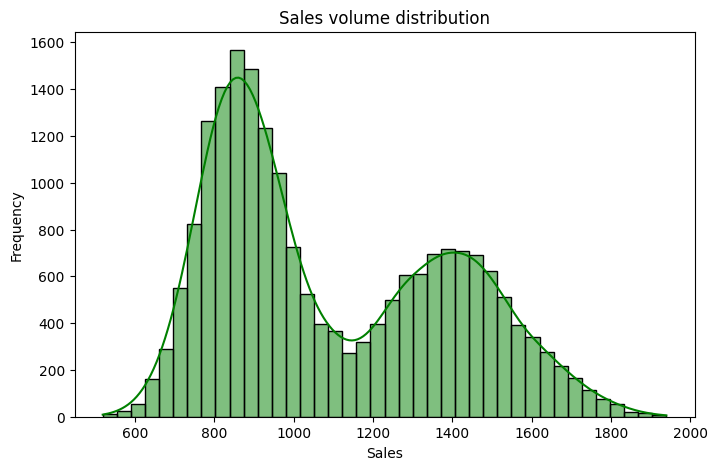

In [ ]:
#------------------------------------------------
# 2.5 Distribucion de la variable (Sales Volume)
#------------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['Sales Volume'], bins=40, kde=True, color='green')
plt.title('Sales volume distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

2.5 Una distribución bimodal suele indicar que la población de datos no es homogénea y probablemente esté compuesta por dos grupos subyacentes con comportamientos o características diferentes.

In [ ]:
# =========================
# 2.6. GRANULARIDAD
# =========================

print("🔍 GRANULARIDAD")
print("Columnas:", list(df.columns))
print("Cantidad de filas:", len(df))



# Chequeo rápido si hay cliente/producto repetidos
for col in posibles_ids:
    print(f"{col}: {df[col].nunique()} valores únicos")

🔍 GRANULARIDAD
Columnas: ['Product ID', 'Product Position', 'Promotion', 'Product Category', 'Seasonal', 'Sales Volume', 'brand', 'url', 'name', 'description', 'price', 'currency', 'terms', 'section', 'season', 'material', 'origin']
Cantidad de filas: 20252
Product ID: 20252 valores únicos


2.6 Como ambos números son idénticos, podemos concluir que cada fila del dataset representa un producto único e irrepetible. No hay duplicados de productos, ni registros de múltiples transacciones para un mismo ID en este archivo.

In [ ]:
#------------------------------------
#2.7 Tipos de registros por cada campo
#-------------------------------------
import pandas as pd

#  Iterar sobre cada columna para ver sus valores únicos
for col in df.columns:
    print(f"\n--- Columna: {col} ---")

    # Obtenemos los valores únicos
    valores_unicos = df[col].unique()
    cantidad_unicos = len(valores_unicos)

    # Si son menos de 20 valores únicos, los mostramos todos (categorias)
    if cantidad_unicos < 20:
        print(f"Valores ({cantidad_unicos}): {valores_unicos}")

        #  Ver la frecuencia de cada valor
        print("Conteo por valor:")
        print(df[col].value_counts())

    # Si son muchos valores, mostramos solo los primeros 5 y el total (ideal para precios o IDs)
    else:
        print(f"Demasiados valores únicos ({cantidad_unicos}).")
        print(f"Primeros 5 ejemplos: {valores_unicos[:5]}")


--- Columna: Product ID ---
Demasiados valores únicos (20252).
Primeros 5 ejemplos: [185102 188771 180176 112917 192936]

--- Columna: Product Position ---
Valores (3): ['Aisle' 'End-cap' 'Front of Store']
Conteo por valor:
Product Position
Aisle             7810
End-cap           6791
Front of Store    5651
Name: count, dtype: int64

--- Columna: Promotion ---
Valores (2): ['Yes' 'No']
Conteo por valor:
Promotion
No     11812
Yes     8440
Name: count, dtype: int64

--- Columna: Product Category ---
Valores (1): ['clothing']
Conteo por valor:
Product Category
clothing    20252
Name: count, dtype: int64

--- Columna: Seasonal ---
Valores (2): ['Yes' 'No']
Conteo por valor:
Seasonal
No     10136
Yes    10116
Name: count, dtype: int64

--- Columna: Sales Volume ---
Demasiados valores únicos (1284).
Primeros 5 ejemplos: [1243 1429 1168 1348 1602]

--- Columna: brand ---
Valores (1): ['Zara']
Conteo por valor:
brand
Zara    20252
Name: count, dtype: int64

--- Columna: url ---
Demasiados v

🟠 3 Analisis UNIVARIAL - VISUALIZACION DE DATOS

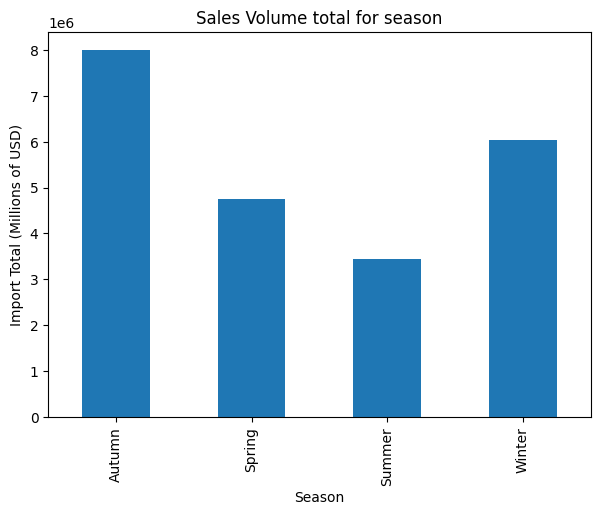

In [ ]:
#-------------------------------------
# 3.1 Sales Volume for season-graphic
#-------------------------------------
sales_for_season = df.groupby('season')['Sales Volume'].sum()
plt.figure(figsize=(7, 5))
sales_for_season.plot(kind='bar')
plt.title('Sales Volume total for season')
plt.xlabel('Season')
plt.ylabel('Import Total (Millions of USD)')
plt.show()

3.1 Interpretación: Podemos observar como en la temporada de Otoño (Autumn) las ventas son muchas siginificativas, como asi tambien que en verano (summer) caen drasticamente.

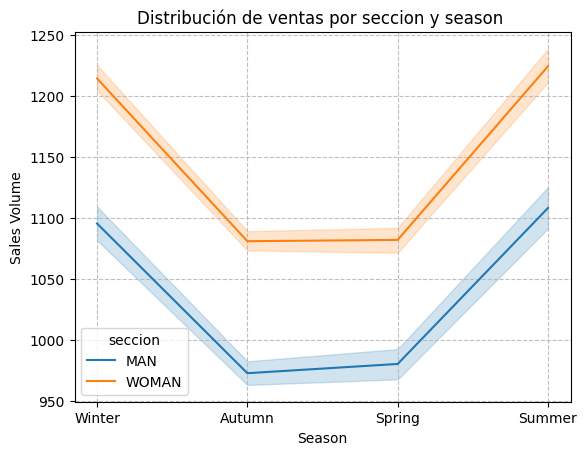

In [ ]:
#---------------------------------
#3.2: Ventas por seccion y season
#----------------------------------
ax = sns.lineplot(data=df, x="season", y="Sales Volume", hue="section")  # Corrected column names
plt.title("Distribución de ventas por seccion y season ")
plt.xlabel("Season"); plt.ylabel("Sales Volume")
plt.grid(True, axis="y", linestyle="--", alpha=0.8)            # <- mejora legibilidad
plt.grid(True, axis="x", linestyle="--", alpha=0.8)
plt.legend(title="seccion")
plt.show()

3.2 Interpretación: Observamos que las Mujeres (Woman) compran mas que los hombres (Man) y que los picos de ventas son en invierno (winter) y verano (summer) para ambos sexos, sin embargo como vimos en el grafico 3.1 en total de USD no es asi.

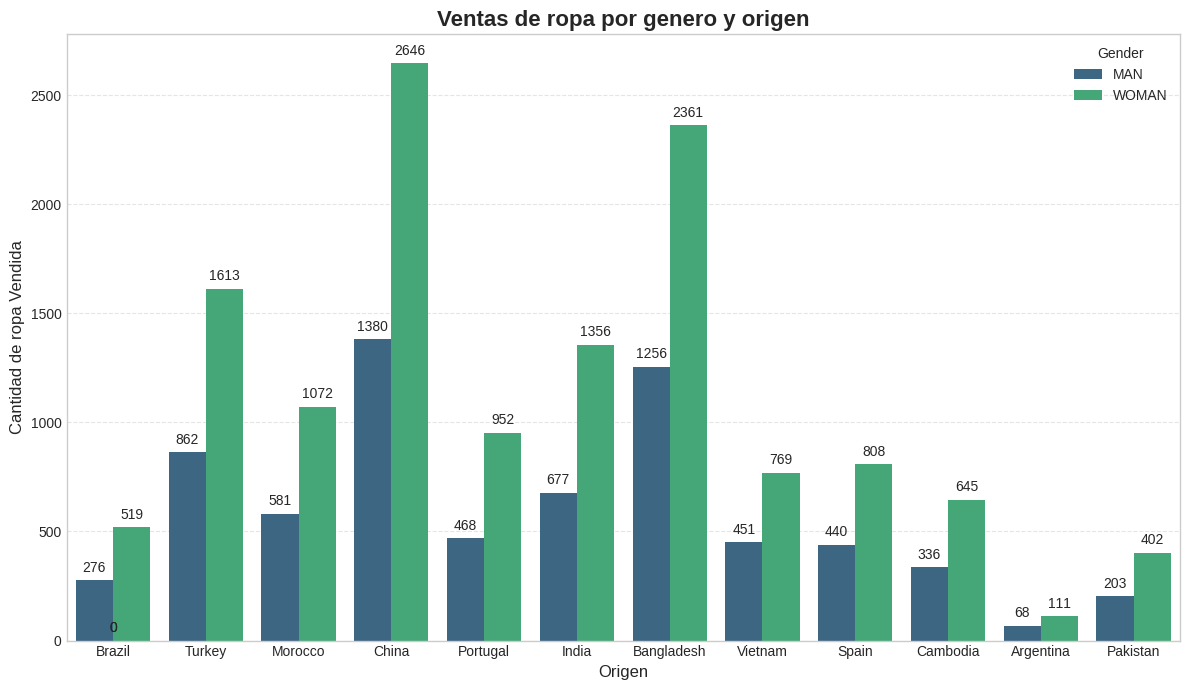

In [ ]:
#-------------------------------------------------------------------
# 3.3 Ventas de ropa por region segun genero
#-------------------------------------------------------------------

# Creación del Gráfico de Barras Agrupadas
plt.style.use('seaborn-v0_8-whitegrid') # Estilo para un mejor aspecto
plt.figure(figsize=(12, 7)) # Tamaño de la figura

# Usamos seaborn.countplot para crear el gráfico
ax = sns.countplot(data=df, x='origin', hue='section', palette='viridis')

# Personalización del Gráfico
plt.title('Ventas de ropa por genero y origen', fontsize=16, fontweight='bold')
plt.xlabel('Origen', fontsize=12)
plt.ylabel('Cantidad de ropa Vendida', fontsize=12)
plt.xticks(rotation=0) # Mantiene las etiquetas del eje x horizontales
plt.legend(title='Gender')

# Añadir etiquetas de texto sobre cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
# Estética general
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout() # Ajusta el gráfico para que no se corten las etiquetas
plt.show()

Grafico 3.3: Visualizamos que los productos mas vendidos son de mujeres y los principales origenes de los mismo son Bangladesh y China

In [ ]:
#3.4 Sales Volume for season
sales_for_season = df.groupby('season')['Sales Volume'].sum()
print("\nSales Volume total for season :")
print(sales_for_season)


Sales Volume total for season :
season
Autumn    7993214
Spring    4746716
Summer    3442417
Winter    6042207
Name: Sales Volume, dtype: int64


--- 1. Estadísticas Descriptivas del Volumen de Ventas ---
Esto proporciona el rango (Mínimo, Máximo) y el centro de la distribución.
|       | Sales Volume   |
|:------|:---------------|
| count | 20252          |
| mean  | 1097.4         |
| std   | 298.235        |
| min   | 518            |
| 25%   | 849            |
| 50%   | 990            |
| 75%   | 1364.25        |
| max   | 1940           |

--- 2. Top 10 Volúmenes de Venta Más Repetidos (Frecuencia) ---
| Volumen de Venta   | Frecuencia   |
|:-------------------|:-------------|
| 848                | 60           |
| 829                | 59           |
| 864                | 54           |
| 838                | 54           |
| 867                | 54           |
| 846                | 53           |
| 872                | 53           |
| 890                | 52           |
| 820                | 52           |
| 869                | 51           |


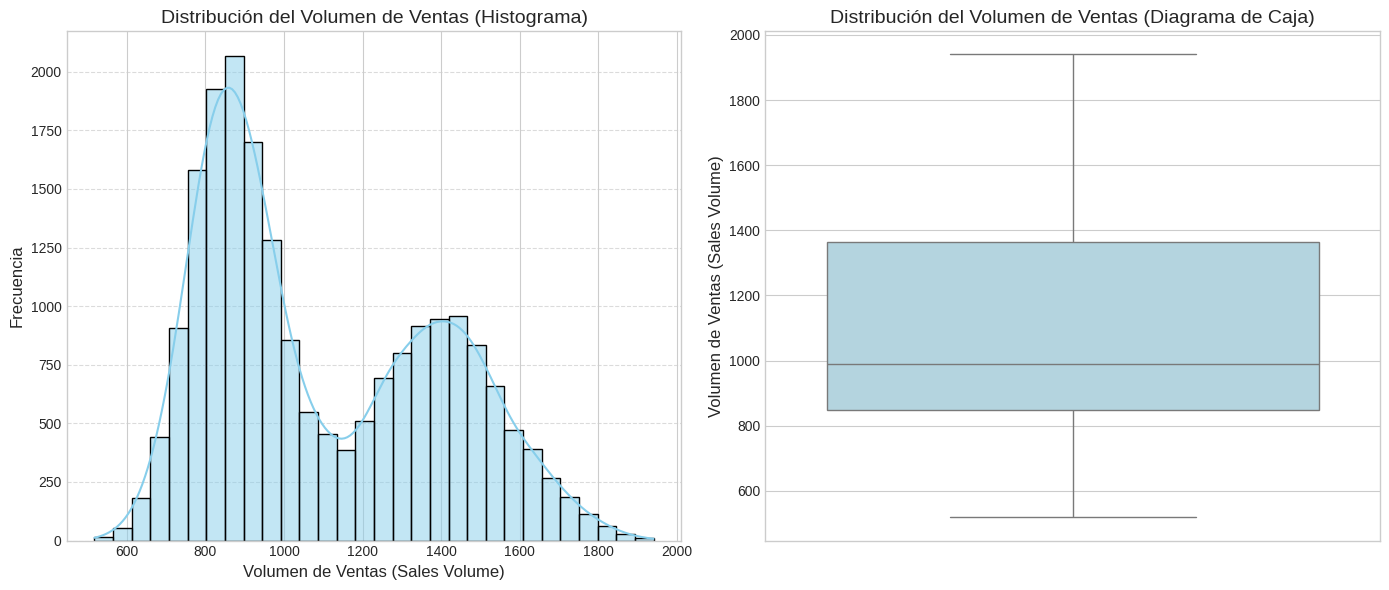

In [ ]:
#----------------------------------------------------------------
#3.5 Estadistica descriptiva y dsitribucion de volumen de ventas
#----------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convertir la columna 'Sales Volume' a tipo numérico si no lo es, manejando posibles errores
try:
    df['Sales Volume'] = pd.to_numeric(df['Sales Volume'], errors='coerce')
    df.dropna(subset=['Sales Volume'], inplace=True)
except Exception as e:
    print(f"Advertencia: No se pudo convertir 'Sales Volume' a numérico. {e}")

print("--- 1. Estadísticas Descriptivas del Volumen de Ventas ---")
print("Esto proporciona el rango (Mínimo, Máximo) y el centro de la distribución.")
sales_stats = df['Sales Volume'].describe().to_frame()
print(sales_stats.to_markdown(numalign="left", stralign="left"))

print("\n--- 2. Top 10 Volúmenes de Venta Más Repetidos (Frecuencia) ---")
# Usamos value_counts() para encontrar la frecuencia de cada valor
# y head(10) para mostrar los 10 valores más comunes.
sales_counts = df['Sales Volume'].value_counts().head(10).to_frame(name='Frecuencia')
sales_counts.index.name = 'Volumen de Venta'
print(sales_counts.to_markdown(numalign="left", stralign="left"))

# --- 3. Visualización de la Distribución ---
plt.figure(figsize=(14, 6))

# Histograma para ver la forma de la distribución y la frecuencia
plt.subplot(1, 2, 1)
sns.histplot(df['Sales Volume'], kde=True, bins=30, color='#87CEEB') # Usamos un color celeste de Zara
plt.title('Distribución del Volumen de Ventas (Histograma)', fontsize=14)
plt.xlabel('Volumen de Ventas (Sales Volume)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Diagrama de Caja (Boxplot) para ver el rango, cuartiles y atípicos
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Sales Volume'], color='#ADD8E6')
plt.title('Distribución del Volumen de Ventas (Diagrama de Caja)', fontsize=14)
plt.ylabel('Volumen de Ventas (Sales Volume)', fontsize=12)

plt.tight_layout()
plt.show()

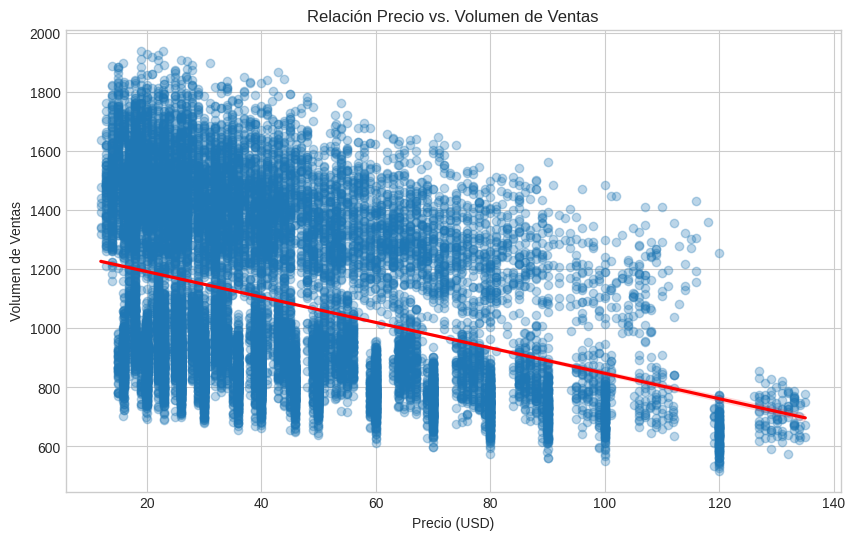

Correlación de Pearson: -0.34


In [ ]:
#---------------------------------------------------------
#3.6 Relación entre Precio (Price) y Ventas (Sales Volume)
#---------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Gráfico de Dispersión con Línea de Tendencia
plt.figure(figsize=(10, 6))
sns.regplot(x='price', y='Sales Volume', data=df,
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relación Precio vs. Volumen de Ventas')
plt.xlabel('Precio (USD)')
plt.ylabel('Volumen de Ventas')
plt.show()

# Cálculo de Correlación
corr, p_value = stats.pearsonr(df['price'], df['Sales Volume'])
print(f"Correlación de Pearson: {corr:.2f}")

3.6 Conclusión: Vemos que el coef. de pearson es negativo, esto nos indica que a mayor Precio menores ventas.

🟠 4 Outliers

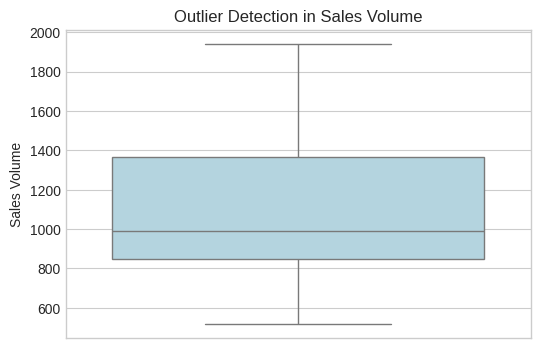

In [ ]:
#------------------------------------------
#4.1 Outliers de la variable "Sales Volume"
#-------------------------------------------
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Sales Volume'], color='lightblue')
plt.title('Outlier Detection in Sales Volume')
plt.show()

In [ ]:
#Outliers (quantification)
Q1 = df['Sales Volume'].quantile(0.25)
Q3 = df['Sales Volume'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Sales Volume'] < (Q1 - 1.5 * IQR)) | (df['Sales Volume'] > (Q3 + 1.5 * IQR))]
print(f"\nNumber of outliers in Sales Volume: {outliers.shape[0]} ({(outliers.shape[0]/len(df))*100:.2f}%)")


Number of outliers in Sales Volume: 0 (0.00%)


4 Conclusión: no se registran valores atipicos

🟠 5 Curtosis

Curtosis (Volumen de Ventas): -1.01
Curtosis (Precio): 1.24


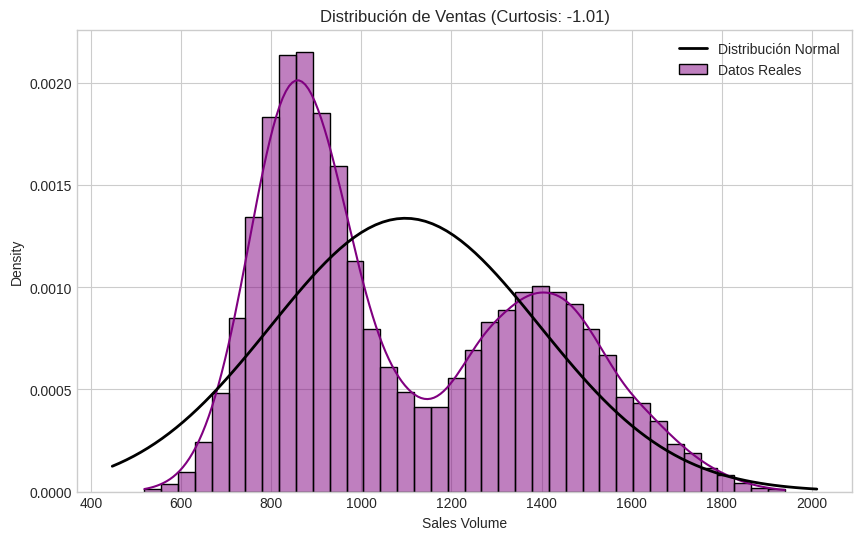

In [ ]:
#---------------------------------------------------------------------------
#5.1 Analizamos Curtosis vs Distribucion Normal de la variblae Sales Volume
# y calculamos la curtosos para la variable Price.
#---------------------------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# 1. Calcular la Curtosis (Método Fisher: Normal = 0)
curtosis_ventas = df['Sales Volume'].kurtosis()
curtosis_precio = df['price'].kurtosis()

print(f"Curtosis (Volumen de Ventas): {curtosis_ventas:.2f}")
print(f"Curtosis (Precio): {curtosis_precio:.2f}")

# 2. Visualización: Histograma + Curva Normal de referencia
plt.figure(figsize=(10, 6))

# Dibujamos los datos reales (Histograma y KDE)
sns.histplot(df['Sales Volume'], kde=True, stat="density", color="purple", label="Datos Reales")

# Dibujamos una curva Normal teórica con el mismo promedio y desviación para comparar
x_min, x_max = plt.xlim()
x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, df['Sales Volume'].mean(), df['Sales Volume'].std())
plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal')

plt.title(f'Distribución de Ventas (Curtosis: {curtosis_ventas:.2f})')
plt.legend()
plt.show()

5.1 Interpretación Grafica: Al ser negativa (-1.01), la curva es más achatada que una normal y se define como Platicúrtica obteniendo menos valores extremos. Las ventas son dispersas.
Interpretación Curtosis Price: Al se un valor positiv (1.24) la curva es mas picuda y tiene colas mas pesadas. Como vimos en el capitulo 3.6 los grandes volumenes de ventan se dan entre 20 y 60 USd pero los extremos que son caros extiran la curva.


🟠 6 Analisis Bivariado

In [ ]:
#---------------------------------------------------------
#6.1 ¿El género influye en el precio del producto elegido?
#---------------------------------------------------------
import scipy.stats as stats
import pandas as pd

# 1. Convertir Género a Binario (0 y 1)
# La correlación biserial necesita números, no texto.
df['genero_binario'] = df['section'].apply(lambda x: 1 if x == 'WOMAN' else 0)

# 2. Calcular Correlación Biserial (Género vs Precio)
r, p_value = stats.pointbiserialr(df['genero_binario'], df['price'])

print(f"Correlación Biserial: {r:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("Conclusión: No hay relación significativa entre el género y el precio.")


Correlación Biserial: -0.0055
P-value: 0.4345
Conclusión: No hay relación significativa entre el género y el precio.


6.1 Al aplicar una correlación Biserial Puntual, obtuvimos un coeficiente de -0.005 con un p-value de 0.43. Dado que el p-value es mayor a 0.05, concluimos que no existe una relación significativa entre el género y el precio. Esto indica que ZARA mantiene una estrategia de precios homogénea, donde los productos de hombres y mujeres tienen rangos de costos similares

In [ ]:
#------------------------------
#6.2 Genero vs tipo de producto
#-------------------------------

#8.2.1 Tabla cruzada de frecuencia
import pandas as pd

# Suponiendo que tu DataFrame se llama 'df'
# 'section' es la columna de Hombre/Mujer
# 'terms' es la columna de preferencia de productos (tipo de prenda)

tabla_contingencia = pd.crosstab(df['section'], df['terms'])

print("--- Tabla de Contingencia ---")
print(tabla_contingencia)

--- Tabla de Contingencia ---
terms    jackets  jeans  shoes  sweaters  t-shirts
section                                           
MAN         3898    213    853      1147       887
WOMAN       7334    446   1605      2110      1759


In [ ]:

#6.2.2 Cálculo de coeficiente Chi-Cuadrado de Pearson
import scipy.stats as stats

# Ejecutamos la prueba de Chi-cuadrado de independencia
chi2, p, dof, expected = stats.chi2_contingency(tabla_contingencia)

# Mostramos los resultados
print(f"\n--- Resultados de la Prueba Chi-Cuadrado ---")
print(f"Estadístico Chi2: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Grados de libertad: {dof}")

# Interpretación automática
alpha = 0.05
if p < alpha:
    print("\nConclusión: Existe una relación significativa entre el género y la preferencia de productos ")
else:
    print("\nConclusión: No existe una relación significativa, las preferencias son independientes del género ")


--- Resultados de la Prueba Chi-Cuadrado ---
Estadístico Chi2: 3.4661
P-value: 0.4831
Grados de libertad: 4

Conclusión: No existe una relación significativa, las preferencias son independientes del género 


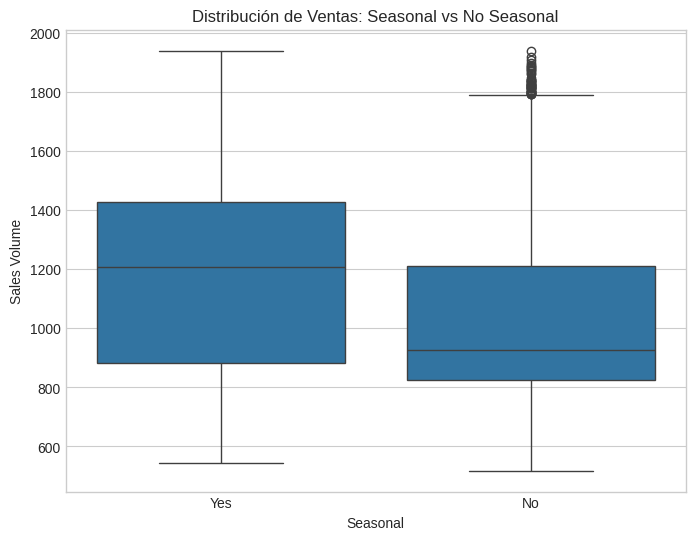

Promedio Ventas (Seasonal): 1171.75
Promedio Ventas (No Seasonal): 1023.20
P-value: 9.082270678105587e-284
Conclusión: La diferencia en ventas es estadísticamente significativa.


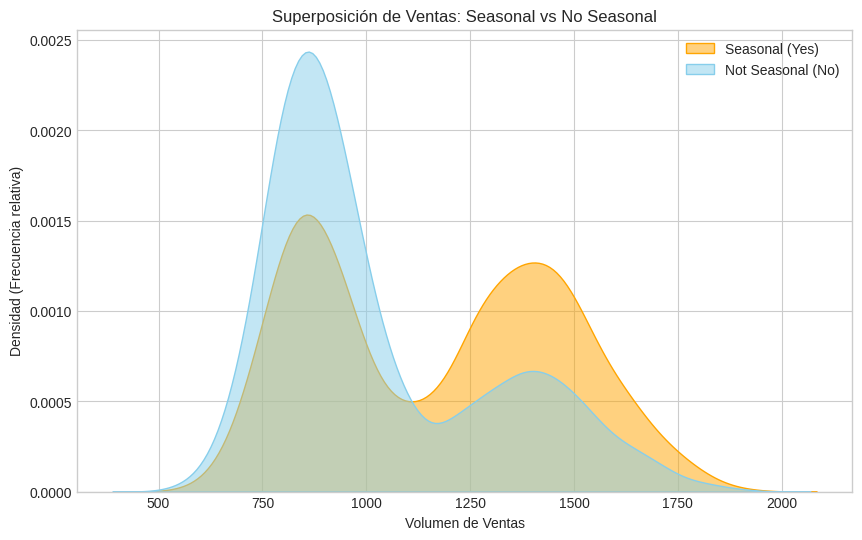

Diferencia: +14.52%


In [ ]:
#---------------------------------------------------------------------------------------------------------------------
#6.3 Existe una relacion significativa entre el producto de estacion (seasonal) y el volumen de ventas (Sales Volume)?
#----------------------------------------------------------------------------------------------------------------------
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Análisis Visual con Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Seasonal', y='Sales Volume', data=df)
plt.title('Distribución de Ventas: Seasonal vs No Seasonal')
plt.show()

# 2. Análisis Estadístico (Prueba T de Student)
grupo_seasonal = df[df['Seasonal'] == 'Yes']['Sales Volume']
grupo_no_seasonal = df[df['Seasonal'] == 'No']['Sales Volume']

# Realizamos la prueba T para muestras independientes
t_stat, p_val = stats.ttest_ind(grupo_seasonal, grupo_no_seasonal, equal_var=False)

print(f"Promedio Ventas (Seasonal): {grupo_seasonal.mean():.2f}")
print(f"Promedio Ventas (No Seasonal): {grupo_no_seasonal.mean():.2f}")
print(f"P-value: {p_val}")

if p_val < 0.05:
    print("Conclusión: La diferencia en ventas es estadísticamente significativa.")
else:
    print("Conclusión: No hay evidencia suficiente para afirmar que las ventas son diferentes.")

# 3. Grafico de densidad para ver que tan significativo son los resultados
# Separamos los datos en dos grupos para facilitar el ploteo
ventas_seasonal = df[df['Seasonal'] == 'Yes']['Sales Volume']
ventas_no_seasonal = df[df['Seasonal'] == 'No']['Sales Volume']

# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 6))

# Dibujamos las curvas de densidad (KDE)
# alpha=0.5 hace que el color sea transparente para ver el solapamiento
sns.kdeplot(ventas_seasonal, fill=True, label='Seasonal (Yes)', color='orange', alpha=0.5)
sns.kdeplot(ventas_no_seasonal, fill=True, label='Not Seasonal (No)', color='skyblue', alpha=0.5)

# Etiquetas y Títulos
plt.title('Superposición de Ventas: Seasonal vs No Seasonal')
plt.xlabel('Volumen de Ventas')
plt.ylabel('Densidad (Frecuencia relativa)')
plt.legend() # Muestra la leyenda para identificar los colores

# Mostrar grafico
plt.show()


# 4 Promedio porcentual
# Agrupamos y calculamos el promedio
promedios = df.groupby('Seasonal')['Sales Volume'].mean()

venta_seasonal = promedios['Yes']
venta_no_seasonal = promedios['No']

# Aplicamos la fórmula
diferencia_porcentual = ((venta_seasonal - venta_no_seasonal) / venta_no_seasonal) * 100

print(f"Diferencia: +{diferencia_porcentual:.2f}%")

6.3 Interpretación: Los productos de temporada tienen un volumen de ventas promedio superior (aprox. +14.5%) a los productos no estacionales.
-El gráfico de caja muestra claramente que la mediana de ventas (la línea dentro de la caja) es más alta para los productos "Seasonal" (Yes) que para los "No Seasonal.

-Sin embarjo como la diferencia porcentual en el promedio de las ventas no es tan elevado es mas probable que se venda pero no es una garantia ni mucho menos

🟠 Models

In [ ]:
#DEFINIR COLUMNAS
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- Variables numéricas que usaremos ---
columnas_num = ['price']

# --- Variables categóricas disponibles ---
columnas_cat = ['Promotion','Product Category', 'Seasonal',     'name', 'terms','section','material','origin', 'season']

In [ ]:
#CLASIFICACION
# Codificar variables categóricas con one-hot encoding
df_cod = pd.get_dummies(df[columnas_cat], drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd


# --- Variables numéricas y categóricas que realmente existen ---
columnas_num = ['price']
columnas_cat = ['Promotion','Product Category', 'Seasonal',     'name', 'terms','section','material','origin', 'season']

# --- Codificamos las categóricas ---
df_cod = pd.get_dummies(df[columnas_cat], drop_first=True)

# --- Escalamos las variables numéricas ---
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df[columnas_num]), columns=columnas_num)

# --- Combinamos los datos preparados ---
X = pd.concat([df_num, df_cod], axis=1)
y = df['Sales Volume']

# --- Dividimos en conjunto de entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Verificación de shapes ---
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (16201, 17246)
y_train shape: (16201,)


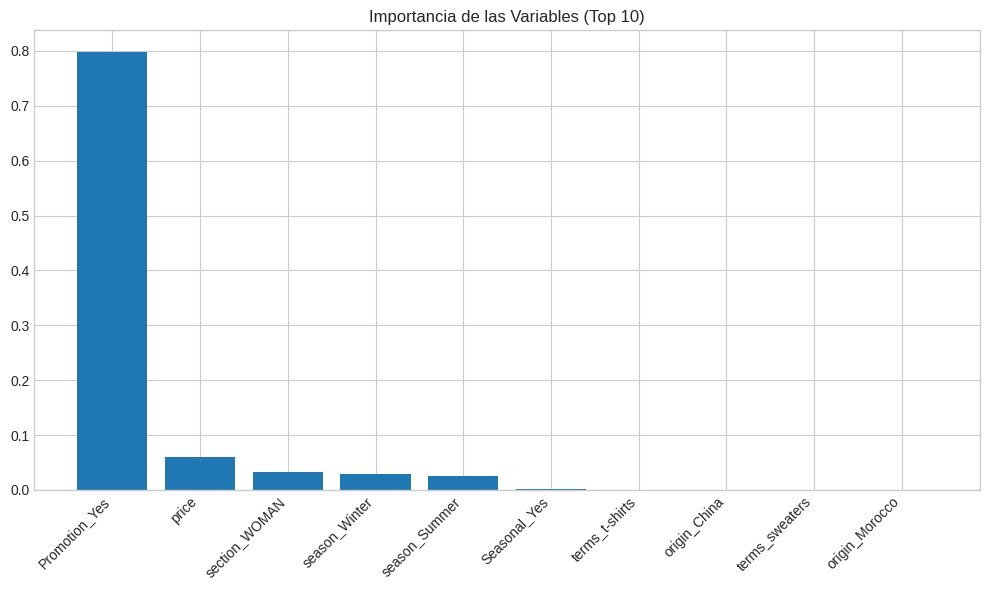

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Entrenamos un modelo rápido para medir importancia de variables
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Obtenemos importancias
importancias = model.feature_importances_
indices = np.argsort(importancias)[::-1]
nombres_features = X.columns[indices]

# Mostramos top 10
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Variables (Top 10)")
plt.bar(range(10), importancias[indices][:10], align='center')
plt.xticks(range(10), nombres_features[:10], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# --- Filtrar solo las 5 variables más importantes según el análisis anterior ---
features_top = ['Promotion_Yes','price','section_WOMAN','season_Summer','Seasonal_Yes']
X_train_sel = X_train[features_top]
X_test_sel = X_test[features_top]

# --- Entrenar modelo de regresión lineal ---
modelo = LinearRegression()
modelo.fit(X_train_sel, y_train)

# --- Predicciones ---
y_pred = modelo.predict(X_test_sel)



# --- Evaluación ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🔍 Evaluación del modelo:")
print(f"MAE (Error absoluto medio): {mae:.2f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.2%}")


🔍 Evaluación del modelo:
MAE (Error absoluto medio): 77.05
RMSE (Raíz del error cuadrático medio): 99.09
R² (Coeficiente de determinación): 88.82%


**MAE (Error Absoluto Medio):** 77.05 Esto significa que, en promedio, el modelo se equivoca por unos 77.05 unidades al predecir las ventas de una observación.

**RMSE (Raíz del Error Cuadrático Medio): 99.09** Es un poco más sensible a errores grandes que el MAE (porque penaliza más los outliers).

En este caso, sigue estando dentro de un margen razonable: el modelo es robusto y los errores grandes no son frecuentes.

 **R² (Coeficiente de Determinación): 88.82%.** El modelo explica el 88.82 % de la variabilidad total de las ventas ( Sales Volume).

Es excelente.